# Ajuste de uma Série Temporal através de Redes Neurais

In [1]:
#Importe dos pacotes #keras==2.2.4 e tensorflow==1.14.0
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#Leitura dos dados
y=pd.Series([28.44194,29.02500,29.43871,27.29667,26.31613,25.21000,27.06774,26.27742,
29.65333,28.43548,29.74000,27.40000,29.81935,30.73929,29.12581,27.68000,
26.37097,24.51000,25.58065,27.02258,28.13667,28.61935,26.75667,28.95484,
28.50000,30.79286,27.51290,27.81667,26.38387,25.14000,25.49032,28.61935,
28.55000,26.98710,25.83667,26.47097,27.46129,28.96552,28.92903,27.89667,
24.30968,25.85333,25.35806,24.73871,29.28000,30.04194,27.64333,30.16452,
27.70645,29.58214,28.47097,26.69333,25.66129,25.59667,26.02903,26.74839,
28.00333,27.12581,27.60667,28.51935,30.79677,30.28929,28.57097,27.80000,
26.39677,25.86000,24.42581,27.32258,29.49000,29.71935,28.77000,28.81935,
31.65161,28.95357,28.92581,27.57333,24.93548,24.81000,25.96774,27.10000,
30.73667,32.73548,30.83667,30.00323,28.35161,31.05862,28.94839,29.09333,
27.15161,24.62000,26.58065,27.93871,29.95000,29.63871,27.95000,28.95161,
30.20645,28.36429,29.50000,28.12000,25.94194,25.90667,23.39032,27.74839,
27.65000,30.53871,27.32667,28.54516,29.76129,28.16786,29.12903,27.08333,
25.97742,25.86667,25.94194,26.17419,28.51000,29.50000,26.91667,29.15806,
30.80968, 30.12857, 29.52581, 29.14333, 27.83226, 26.06333, 25.31290, 27.25484,30.50667, 32.00000, 29.95000, 28.79355])

In [3]:
#Construindo uma base utilizando como features as observações anteriores
anos=2
base=pd.DataFrame({"y":y})
base_treinamento = base.iloc[0:(base.shape[0]-12), 0:1].values

normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

previsores = []
preco_real = []
for i in range(anos*12, base_treinamento.shape[0]):
    previsores.append(base_treinamento_normalizada[i-anos*12:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [4]:
#Ajuste da Rede Neural

regressor = Sequential()
regressor.add(LSTM(units = anos*12, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.1))

# regressor.add(LSTM(units = anos*6, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = anos*6, return_sequences = True))
# regressor.add(Dropout(0.2))

regressor.add(LSTM(units = anos*6))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', 
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 20)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
96/96 [==============================] - 2s 17ms/step - loss: 0.2025 - mean_absolute_error: 0.3995
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0697 - mean_absolute_error: 0.2131
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0501 - mean_absolute_error: 0.1811
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0474 - mean_absolute_error: 0.1795
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0468 - mean_absolute_error: 0.1751
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0512 - mean_absolute_error: 0.1831
Epoch 7/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_absolute_error: 0.1747
Epoch 8/100
96

In [5]:
#Dados de teste
base_teste=base.iloc[(base.shape[0]-12):base.shape[0], 0:1]
preco_real_teste=base.iloc[(base.shape[0]-12):base.shape[0], 0:1].values

In [6]:
#Une os dados de treino e teste para montagem da base histórica e padroniza as variáveis
base_completa = base[['y']]
entradas = base_completa[len(base_completa) - len(base_teste) - (anos*12):].values
entradas = entradas.reshape(-1,1)
entradas = normalizador.transform(entradas)

In [7]:
#Monta a base histórica para os dados de teste
X_teste = []
for i in range(anos*12, (anos*12+12)):
    X_teste.append(entradas[(i-anos*12):i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [8]:
#Predita os dados de teste
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

In [9]:
#Vompartivo entre o predito e o real
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
print("Média previsões:",previsoes.mean())
print("Média real:",preco_real_teste.mean())
print("RMSE:",math.sqrt(mean_squared_error(preco_real_teste,previsoes)))
print("MAE:",mean_absolute_error(preco_real_teste,previsoes))

Média previsões: 27.733568
Média real: 28.943411666666663
RMSE: 1.7723013200835787
MAE: 1.48376365620931


In [10]:
#ajuste no formato da predição
pred=pd.Series(np.reshape(previsoes, (12,)).tolist(),index=range((base.shape[0]-12),base.shape[0]))

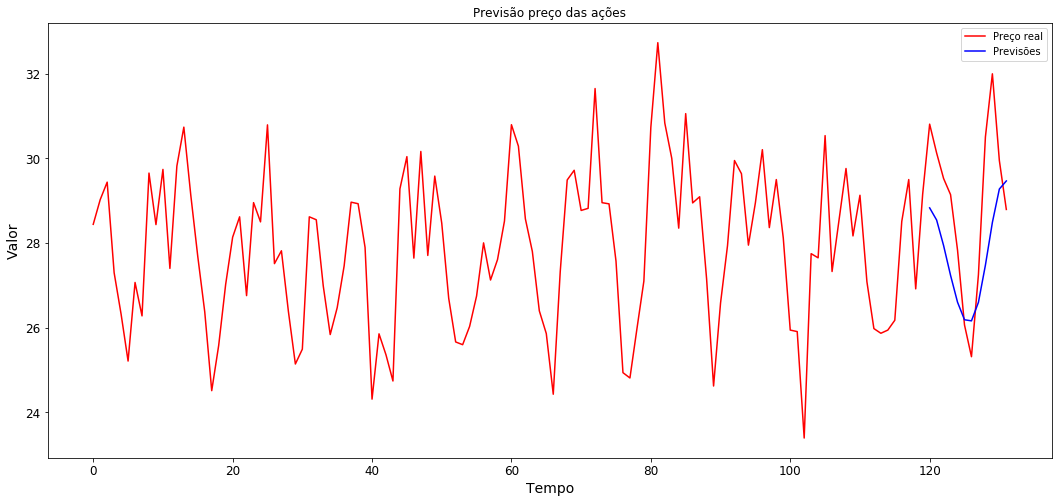

In [11]:
#Gráfico compartivo entre o real e o predito
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.plot(base.y, color = 'red', label = 'Preço real')
plt.plot(pred, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()